### Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. 

In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. 

In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. 

In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

### Purpose of Task

Investigate a classic phenomenon from experimental psychology called the Stroop Effect using inferential statistics.  Outline the statistical investigation from start to finish and report findings along the way.  Provide justifications for reasonings that support findings. 

### Variable Identification

* Independent Variable - 'Congruent' or 'Incongruent' condition
* Dependent Variable - Time it takes to write the word

### Hypotheses

*The incongruent task will take longer than the congruent task because the combinations are not natural and, therefore, the taker requires more response time to process the information.*

* Null Hypothesis (H0) - No change in time between completion of both tasks
* Alternate Hypothesis (H1) - The incongruent task will take longer

#### Calculation Methods

* H0 = μi ≤ μc (μi - population mean of incongruent values, μc - population mean of congruent values)
* H1 = μi > μc (μi - population mean of incongruent values, μc - population mean of congruent values)

### Statistical Test

A t-score was calculated to test my alternate hypothesis against the null hypothesis.  The critial value of the null hypothesis was calculated using a confidence level of 95% and a degree of freedom of 23.  

I chose the t-score because the provided dataset contained fewer than 30 records and the population standard deviation was unknown.

### Results

* Critical Value of null hypothesis - 1.71
* t-score value of alternate hypothesis - 8.02

#### Interpretation

The t-score of 8.02 is significantly higher than the critical value of the null hypothesis, which allows for the rejection of the null hypothesis.  

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy.stats import t
%matplotlib inline
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

Import CSV file containing stroop data and reporting of some descriptive statistics:

In [3]:
df = pd.read_csv('C:\\Users\\josep\\Downloads\\stroopdata.csv')

# Print the mean and standard deviation for both columns

print(df.mean(axis=0))
print(df.std(axis=0))

print("standard deviation for congruent {0:.3f}".format(np.std(df['Congruent'].values)))
print("standard deviation for Incongruent {0:.3f}".format(np.std(df['Incongruent'].values)))

Congruent      14.051125
Incongruent    22.015917
dtype: float64
Congruent      3.559358
Incongruent    4.797057
dtype: float64
standard deviation for congruent 3.484
standard deviation for Incongruent 4.696


In [4]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Confirmed information as outlined in initial query. 

<AxesSubplot:xlabel='Congruent', ylabel='Density'>

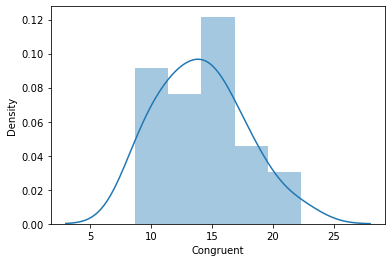

In [5]:
sns.distplot(df['Congruent'])

Normal distribution of "Congruent" data, with the mean coming in at roughly 14. 

<AxesSubplot:xlabel='Incongruent', ylabel='Density'>

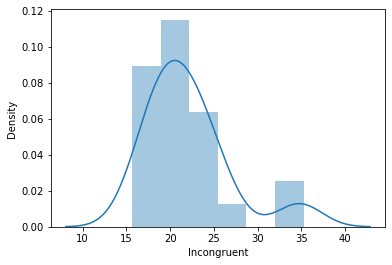

In [6]:
sns.distplot(df['Incongruent'])

Mostly normal distribution of "Incongruent" data, with a slight bimodal peak on the right.  The primary peak appears at roughly 21.   

Text(0.5, 1.0, 'Boxplot plot for Incongruent')

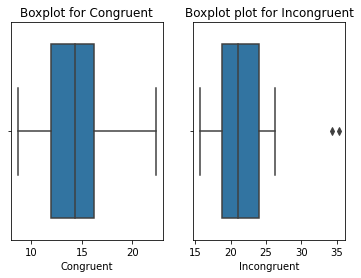

In [7]:
fig, axs = plt.subplots(1,2,)
g = sns.boxplot(df['Congruent'],ax=axs[0])
g.set_title("Boxplot for Congruent")
h = sns.boxplot(df['Incongruent'],ax = axs[1])
h.set_title("Boxplot plot for Incongruent")

Boxplot visuals confirm both means and highlight outliers in Incongruent data. 

In [8]:
# t-critical value for a 95% confidence level and 23 degree of freedom

t.ppf(.95, 23)

1.7138715277470473

In [9]:
# Find the standard deviation of the difference between congruent and incongruent data

df['Difference'] = df['Congruent'] - df['Incongruent']
print("Standard deviation of differences: {0:.4f}".format(df['Difference'].std(axis=0)))

Standard deviation of differences: 4.8648


In [10]:
# Compute mean of differences

mean_dif = df['Incongruent'].mean() - df['Congruent'].mean()
print("Mean of differences: ", mean_dif)

Mean of differences:  7.9647916666666685


In [11]:
df['dif'] = df['Incongruent'] - df['Congruent']
print(df['dif'].describe())
std_dif = df['dif'].describe()[2]

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
Name: dif, dtype: float64


Confirmed stats of differences.

In [12]:
# Formula for creation of t-score

t_stat = mean_dif/(std_dif/math.sqrt(df.shape[0]))

In [13]:
t_stat

8.020706944109962

### References

* https://faculty.washington.edu/chudler/java/ready.html
* https://en.wikipedia.org/wiki/Stroop_effect
* https://github.com/simrankoul/Test-A-Perceptual-Phenomenon
* https://github.com/abodacs/Test-a-Perceptual-Phenomenon
* https://github.com/Shreyas3108/Test-a-perceptual-phenomenon
* https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython
* https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/
